In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline
import seaborn as sns
import sklearn.datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [31]:
iris_data = sklearn.datasets.load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
X, y = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names), pd.DataFrame(data=iris_data.target, columns=["iris_type"])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [17]:
logreg = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial")
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [20]:
logreg.predict_proba(X_test)

array([[1.17924703e-04, 5.61479667e-02, 9.43734109e-01],
       [1.26288661e-02, 9.60454922e-01, 2.69162124e-02],
       [9.84397680e-01, 1.56022816e-02, 3.85650267e-08],
       [1.25180832e-06, 2.31530394e-02, 9.76845709e-01],
       [9.70234755e-01, 2.97650820e-02, 1.62609745e-07],
       [2.01669798e-06, 5.94453033e-03, 9.94053453e-01],
       [9.81899481e-01, 1.81004487e-02, 7.04478339e-08],
       [2.84241427e-03, 7.47089885e-01, 2.50067701e-01],
       [1.50915665e-03, 7.38524267e-01, 2.59966577e-01],
       [2.05287874e-02, 9.35891198e-01, 4.35800150e-02],
       [9.22436289e-05, 1.59475749e-01, 8.40432007e-01],
       [6.98627957e-03, 8.09989247e-01, 1.83024474e-01],
       [4.08220400e-03, 7.93602802e-01, 2.02314994e-01],
       [3.05681845e-03, 7.60910824e-01, 2.36032358e-01],
       [3.87699846e-03, 7.10277106e-01, 2.85845895e-01],
       [9.82815573e-01, 1.71843701e-02, 5.65491187e-08],
       [6.72901329e-03, 7.56465383e-01, 2.36805604e-01],
       [1.14291723e-02, 8.45111

In [21]:
logreg.score(X_test, y_test)

0.9736842105263158

In [24]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


In [25]:
svc = SVC(kernel="linear", C=1.0, gamma="auto")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

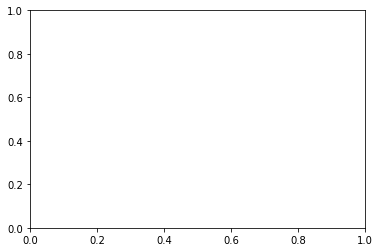

In [30]:
def svc_visualized(iris, kernel="linear", C=1.0, gamma="auto"):
    X, y = iris.data, iris.target

    clf_svc_iris = SVC(kernel=kernel, C=C, gamma=gamma)
    clf_svc_iris.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = (x_max / x_min) / 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    Z = clf_svc_iris.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.BuGn_r)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC (kernel='{}', C={}, gamma={})".format(kernel, C, gamma))

svc_visualized(idd)

In [35]:
wine_data = sklearn.datasets.load_wine()
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [36]:
WX, wy = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names), pd.DataFrame(data=wine_data.target, columns=["wine_quality_type"])
WX.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
wy.head()

,wine_quality_type
0,0
1,0
2,0
3,0
4,0


In [38]:
WX_train, WX_test, wy_train, wy_test = train_test_split(WX, wy, random_state=0, test_size=0.25)
wy_train, wy_test = np.ravel(wy_train), np.ravel(wy_test)

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(WX_train, wy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
wy_pred = knn.predict(WX_test)
print(wy_pred)

[0 1 1 0 1 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 0 2 0 1 1 1]


In [42]:
knn.score(WX_test, wy_test)

0.7333333333333333

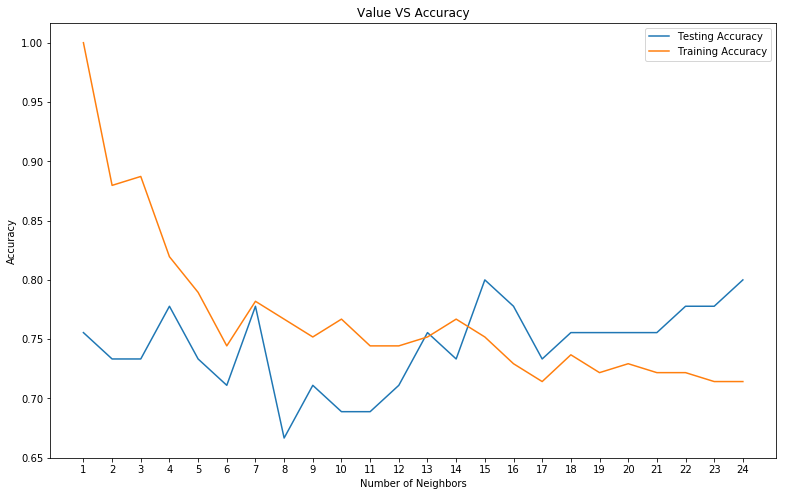

Best Accuracy is 0.8 with K=15


In [43]:
neighbors = np.arange(1, 25)
train_accuracy, test_accuracy = list(), list()

for iterator, kterator in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=kterator)
    knn.fit(WX_train, wy_train)
    train_accuracy.append(knn.score(WX_train, wy_train))
    test_accuracy.append(knn.score(WX_test, wy_test))

plt.figure(figsize=[13, 8])
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.savefig("knn_accuracies.png")
plt.show()

print("Best Accuracy is {} with K={}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))